In [2]:
#4.5.7.8 bad format
#Importación de librerías
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

#Importacion de librerias para plot
import seaborn as sns
import matplotlib.pyplot as pp
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams['figure.figsize']=14,8

#Creación de una Lista
meses = []
#for mes in range (10, 12+1):
#    meses.append(pd.read_csv("2019_{}.csv".format(mes)))
for mes in range(1,13):
    meses.append(pd.read_csv("2019_{}.csv".format(mes)))
    
#Concatenación de los Elementos de la Lista a un DataFrame
datos_df = pd.concat(meses)
datos_df.head()



,ID Viaje,ID Usuario,Género,Año de Nacimiento,Fecha Inicio Viaje,Hora Inicio Viaje,Fecha Fin Viaje,Hora Fin Viaje,ID Origen,ID Destino
0,9008630,22,M,1982.0,10/01/2019,09:08,10/01/2019,09:16,72,199
1,9027183,22,M,1982.0,11/01/2019,10:42,11/01/2019,10:45,49,42
2,9027413,22,M,1982.0,11/01/2019,10:59,11/01/2019,11:02,47,79
3,9157105,22,M,1982.0,19/01/2019,09:54,19/01/2019,09:57,50,52
4,9201803,22,M,1982.0,22/01/2019,10:54,22/01/2019,11:03,72,199


In [3]:
print("Dimension de los datos:",datos_df.shape)

Dimension de los datos: (4631777, 10)


In [4]:
datos_df = datos_df.set_index("ID Usuario").sort_index()
datos_df.head()

,ID Viaje,Género,Año de Nacimiento,Fecha Inicio Viaje,Hora Inicio Viaje,Fecha Fin Viaje,Hora Fin Viaje,ID Origen,ID Destino
ID Usuario,,,,,,,,,
22,9008630,M,1982.0,10/01/2019,09:08,10/01/2019,09:16,72,199
22,13122099,M,1982.0,02/10/19,10:57,02/10/19,11:01,68,65
22,13137212,M,1982.0,03/10/19,10:25,03/10/19,10:28,71,65
22,13177512,M,1982.0,05/10/19,15:59,05/10/19,16:05,3,49
22,13196275,M,1982.0,07/10/19,11:07,07/10/19,11:15,86,199


In [6]:
#Uso de la librería datetime de Python
from datetime import datetime

#Conversión de las Columnas con Fechas al formato de serie de tiempo
datos_df["Fecha Inicio Viaje"] = pd.to_datetime(datos_df["Fecha Inicio Viaje"])
datos_df["Fecha Fin Viaje"] = pd.to_datetime(datos_df["Fecha Fin Viaje"])
datos_df.dtypes

ID Viaje                       int64
Género                        object
Año de Nacimiento            float64
Fecha Inicio Viaje    datetime64[ns]
Hora Inicio Viaje             object
Fecha Fin Viaje               object
Hora Fin Viaje                object
ID Origen                      int64
ID Destino                     int64
dtype: object

In [7]:
datos_df["Fecha Fin Viaje"] = pd.to_datetime(datos_df["Fecha Fin Viaje"])

In [8]:
datos_df.dtypes

ID Viaje                       int64
Género                        object
Año de Nacimiento            float64
Fecha Inicio Viaje    datetime64[ns]
Hora Inicio Viaje             object
Fecha Fin Viaje       datetime64[ns]
Hora Fin Viaje                object
ID Origen                      int64
ID Destino                     int64
dtype: object

In [9]:
datos_df.isnull().sum()

ID Viaje                  0
Género                11064
Año de Nacimiento     11522
Fecha Inicio Viaje        0
Hora Inicio Viaje         0
Fecha Fin Viaje           0
Hora Fin Viaje            0
ID Origen                 0
ID Destino                0
dtype: int64

In [10]:
#Eliminación de renglones con valores nulos
datos_df.dropna(inplace = True)
datos_df.isnull().sum()

ID Viaje              0
Género                0
Año de Nacimiento     0
Fecha Inicio Viaje    0
Hora Inicio Viaje     0
Fecha Fin Viaje       0
Hora Fin Viaje        0
ID Origen             0
ID Destino            0
dtype: int64

In [11]:
#Cantidad de entradas en el DataFrame
(ren, col) = datos_df.shape
print("La cantidad de entradas en el DataFrame sin valores nulos son:", ren, "renglones.")

La cantidad de entradas en el DataFrame sin valores nulos son: 4620166 renglones.


In [25]:
#Determinación de la Media del Año de Nacimiento
media_nacimiento = datos_df["Año de Nacimiento"].mean()
print("La media del año de nacimiento es: %i"% media_nacimiento)
print("La media de la edad de los usuarios es: %i años"% (2020 - media_nacimiento))

La media del año de nacimiento es: 1987
La media de la edad de los usuarios es: 32 años


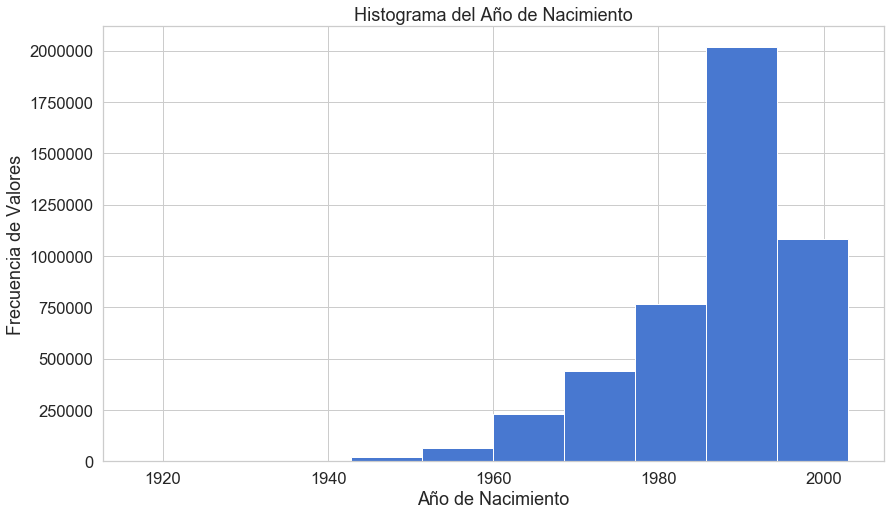

In [27]:
#Realización del Histograma para el Año de Nacimiento
datos_df["Año de Nacimiento"].plot(kind = "hist");
pp.title("Histograma del Año de Nacimiento");
pp.xlabel("Año de Nacimiento");
pp.ylabel("Frecuencia de Valores");

In [5]:
#Determinación de la moda para la Estación de Origen
moda_origen = datos_df["ID Origen"].mode()[0]
print("La Estación de origen más utilizada es la número: ", moda_origen)

La Estación de origen más utilizada es la número:  51


In [6]:
#Determinación de la moda para la Estación de Destino
moda_destino = datos_df["ID Destino"].mode()[0]
print("La Estación de destino más utilizada es la número: ", moda_destino)

La Estación de destino más utilizada es la número:  51


In [7]:
#Lectura del CSV con los datos de las Estaciones
estaciones_df = pd.read_csv("Estaciones.csv", index_col = "ID")
estaciones_df.head()

,Nombre de la Estación,ID Estación,Localización,Latitud,Longitud,Estado
ID,,,,,,
2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,GDL-001,POLÕGONO CENTRAL,20.666378,-103.348820,IN_SERVICE
3,(GDL-002) C. Colonias / Av. NiÒos hÈroes,GDL-002,POLÕGONO CENTRAL,20.667228,-103.366000,IN_SERVICE
4,(GDL-003) C. Vidrio / Av. Chapultepec,GDL-003,POLÕGONO CENTRAL,20.667690,-103.368252,IN_SERVICE
5,(GDL-004) C. Ghilardi /C. Miraflores,GDL-004,POLÕGONO CENTRAL,20.691750,-103.362550,IN_SERVICE
6,(GDL-005) C. San Diego /Calzada Independencia,GDL-005,POLÕGONO CENTRAL,20.681151,-103.338863,IN_SERVICE


In [8]:
#Identificación de la Estación de origen más utilizada
est_origen = estaciones_df.loc[moda_origen]
print("Los datos de la Estación de origen más utilizada son: \n", est_origen)

Los datos de la Estación de origen más utilizada son: 
 Nombre de la Estación    (GDL-049) Lopez Cotilla/ Marcos Castellanos
ID Estación                                                  GDL-049
Localización                                        POLÕGONO CENTRAL
Latitud                                                      20.6741
Longitud                                                    -103.356
Estado                                                    IN_SERVICE
Name: 51, dtype: object


In [9]:
#Identificación de la Estación de destino más utilizada
est_destino = estaciones_df.loc[moda_destino]
print("Los datos de la Estación de destino más utilizada son: \n", est_destino)

Los datos de la Estación de destino más utilizada son: 
 Nombre de la Estación    (GDL-049) Lopez Cotilla/ Marcos Castellanos
ID Estación                                                  GDL-049
Localización                                        POLÕGONO CENTRAL
Latitud                                                      20.6741
Longitud                                                    -103.356
Estado                                                    IN_SERVICE
Name: 51, dtype: object


In [10]:
# Determinar la cantidad de viajes realizados por cada usuario
datos_df["Viaje"] = 1
datos_df_agrupa = datos_df[['Género', 'Viaje']]
datos_df_agrupa.groupby(['Género','ID Usuario']).sum()

Viaje
Género ID Usuario       
F      66            127
       78             36
       83             19
       94             42
       125            41
       129             3
       138            34
       210            35
       223            19
       228            12
       238             7
       261            89
       279           174
       295           336
       300             4
       310            29
       317           142
       328           468
       332            28
       338           157
       362            34
       368            42
       383           105
       396           298
       397           346
       400           200
       403           447
       407            25
       415           101
       416           199
...                  ...
M      70298           2
       70301           7
       70303           7
       70306           1
       70310           7
       70311           9
       70313           3
       70314           1
       70320           2
       70321           2
       70322           5
       70338           2
       70347           3
       70349           3
       70402           9
       70408           4
       70414           1
       70420           1
       70423           8
       70425           1
       70428           2
       70429          14
       70433           1
       70434           5
       70435           1
       70437           1
       70438           1
       70444           3
       70445          20
       70455           1

[28326 rows x 1 columns]

In [ ]:
# Determinar el tiempo de recorrido de cada viaje realizado por cada usuario

#Apagar los Warnings
pd.set_option("mode.chained_assignment", None)

datos_df_tiempo = datos_df[["Hora Inicio Viaje", "Hora Fin Viaje"]]

datos_df_tiempo["Hora Inicio Viaje"] = pd.to_datetime(datos_df_tiempo["Hora Inicio Viaje"])
datos_df_tiempo["Hora Fin Viaje"] = pd.to_datetime(datos_df_tiempo["Hora Fin Viaje"])

datos_df['Tiempo'] = datos_df_tiempo["Hora Fin Viaje"] - datos_df_tiempo["Hora Inicio Viaje"]
datos_df

In [36]:
print(datos_df.Tiempo)

ID Usuario
22      00:08:00
22      00:04:00
22      00:03:00
22      00:06:00
22      00:08:00
22      00:08:00
22      00:04:00
22      00:04:00
22      00:09:00
22      00:11:00
22      00:08:00
22      00:06:00
22      00:09:00
22      00:05:00
22      00:09:00
22      00:11:00
22      00:05:00
22      00:08:00
22      00:11:00
22      00:05:00
22      00:12:00
22      00:12:00
22      00:19:00
22      00:06:00
22      00:05:00
22      00:05:00
22      00:03:00
22      00:09:00
22      00:12:00
22      00:05:00
          ...   
70434   00:06:00
70434   00:07:00
70434   00:10:00
70435   00:02:00
70437   00:07:00
70438   00:05:00
70444   00:11:00
70444   00:04:00
70444   00:08:00
70445   00:11:00
70445   00:27:00
70445   00:01:00
70445   00:19:00
70445   00:15:00
70445   00:06:00
70445   00:03:00
70445   00:20:00
70445   00:13:00
70445   00:13:00
70445   00:17:00
70445   00:03:00
70445   00:19:00
70445   00:13:00
70445   00:27:00
70445   00:17:00
70445   00:10:00
70445   00:18:00
704

In [ ]:
#Matriz de correlacion
k = 9
corr_mat = datos_df.corr()
corr_target = abs(corr_mat['Viaje'])
sns.heatmap(corr_mat,annot=True,cmap=plt.cm.Reds)
plt.show()
feat = corr_target[corr_target>.7]
print(feat)

In [53]:
#Primero acomodar por fecha
datos_df_v2 = datos_df.set_index("ID Viaje").sort_index()
datos_df_v2

,Género,Año de Nacimiento,Fecha Inicio Viaje,Hora Inicio Viaje,Fecha Fin Viaje,Hora Fin Viaje,ID Origen,ID Destino,Viaje,Tiempo
ID Viaje,,,,,,,,,,
8901295,M,1992.0,2019-01-01,00:00,2019-01-01,00:16,50,54,1,00:16:00
8901295,M,1992.0,2019-01-01,00:00,2019-01-01,00:16,50,54,1,00:16:00
8901296,M,1985.0,2019-01-01,06:01,2019-01-01,06:16,38,194,1,00:15:00
8901296,M,1985.0,2019-01-01,06:01,2019-01-01,06:16,38,194,1,00:15:00
8901297,M,1995.0,2019-01-01,06:01,2019-01-01,06:09,86,18,1,00:08:00
8901297,M,1995.0,2019-01-01,06:01,2019-01-01,06:09,86,18,1,00:08:00
8901298,M,1998.0,2019-01-01,06:01,2019-01-01,06:02,86,86,1,00:01:00
8901298,M,1998.0,2019-01-01,06:01,2019-01-01,06:02,86,86,1,00:01:00
8901299,M,1992.0,2019-01-01,06:01,2019-01-01,06:05,27,52,1,00:04:00


In [86]:
viajes = []

for mes in range(1,13):
    viajes.append(len(pd.read_csv("2019_{}.csv".format(mes))))


In [97]:
viajes = np.array((viajes))
mes = np.array((1,2,3,4,5,6,7,8,9,10,11,12))
viajes_por_mes = np.column_stack((mes,viajes))

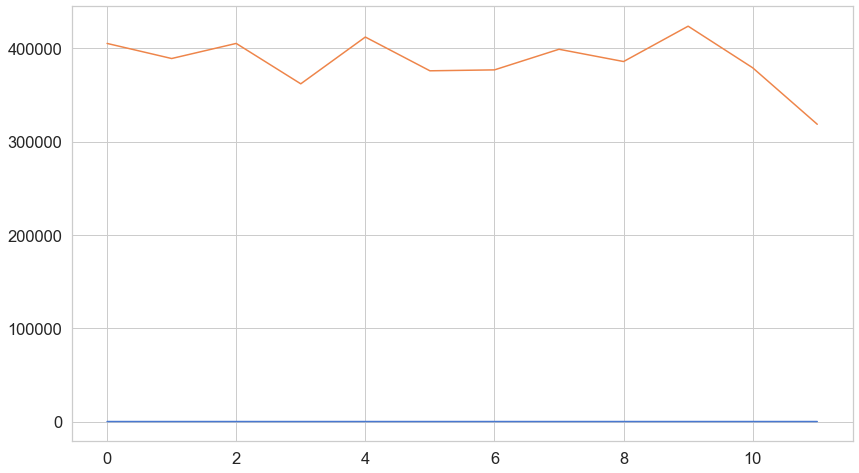

In [104]:
plt.plot(viajes_por_mes);

In [102]:
viajes
mes
vpm_df = pd.DataFrame(viajes_por_mes)
vpm_df.rename(columns = {0:'Mes',1:'Viajes'},inplace = True)
vpm_df

,Mes,Viajes
0,1,405169
1,2,388993
2,3,405169
3,4,361883
4,5,412001
5,6,375834
6,7,376822
7,8,398916
8,9,385766
9,10,423640


In [106]:
#Función para la prueba Dicker-fuller de estacionalidad
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determinación de estadísticos
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Gráfica de los estadísticos
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Prueba Dickey-Fuller
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

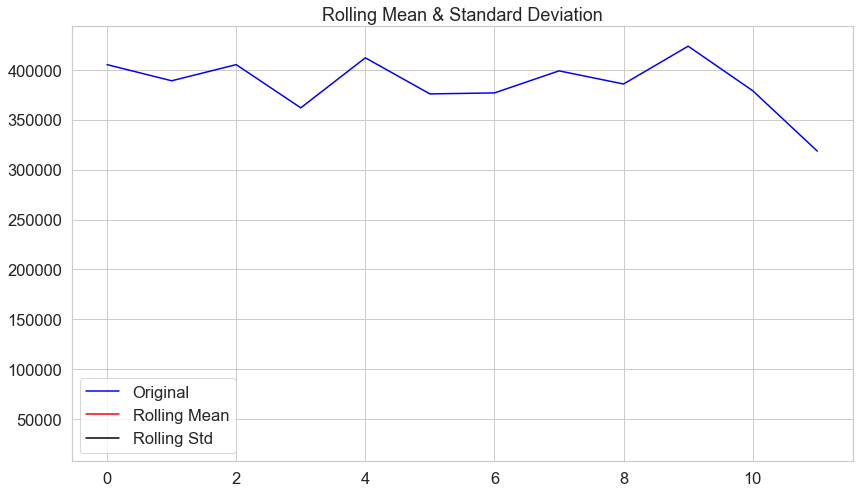

Results of Dickey-Fuller Test:
Test Statistic                -2.208704
p-value                        0.203102
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [109]:
#Realizando la prueba de estacionariedad para la Serie
test_stationarity(vpm_df['Viajes']);

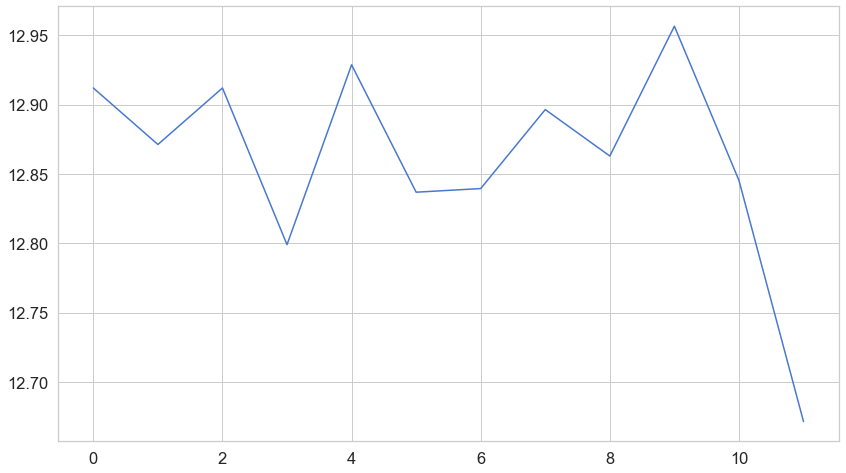

In [111]:
#Transformación logarítmica de la Serie
vpm_df_log = np.log(vpm_df['Viajes'])

plt.plot(vpm_df_log)

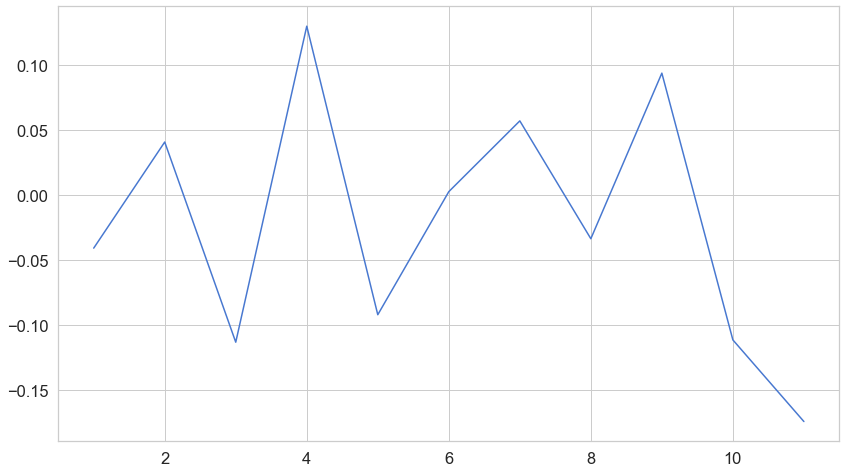

In [113]:
#Se toma la primera diferencia desde la Serie original
vpm_df_log_diff = vpm_df_log - vpm_df_log.shift()

plt.plot(vpm_df_log_diff);

In [114]:
#Eliminando los valores nulos
vpm_df_log_diff.dropna(inplace=True)

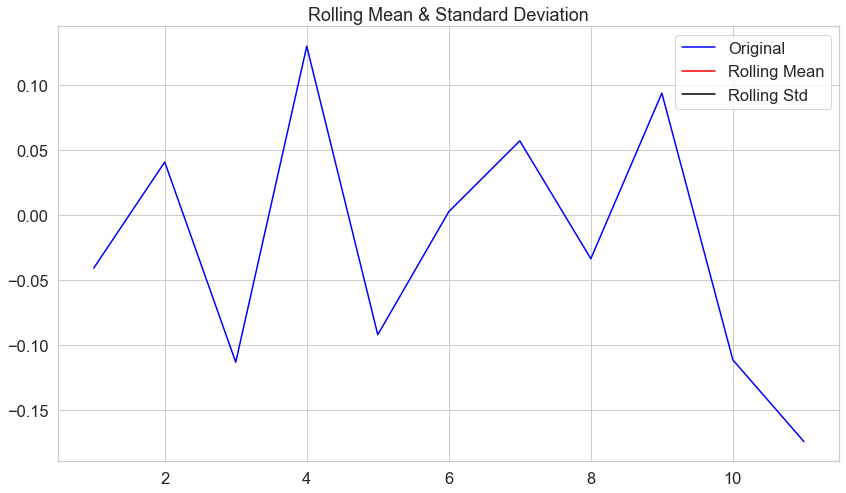

Results of Dickey-Fuller Test:
Test Statistic                 -3.814462
p-value                         0.002763
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [115]:
#Realizando la prueba de estacionariedad para la Serie
test_stationarity(vpm_df_log_diff)

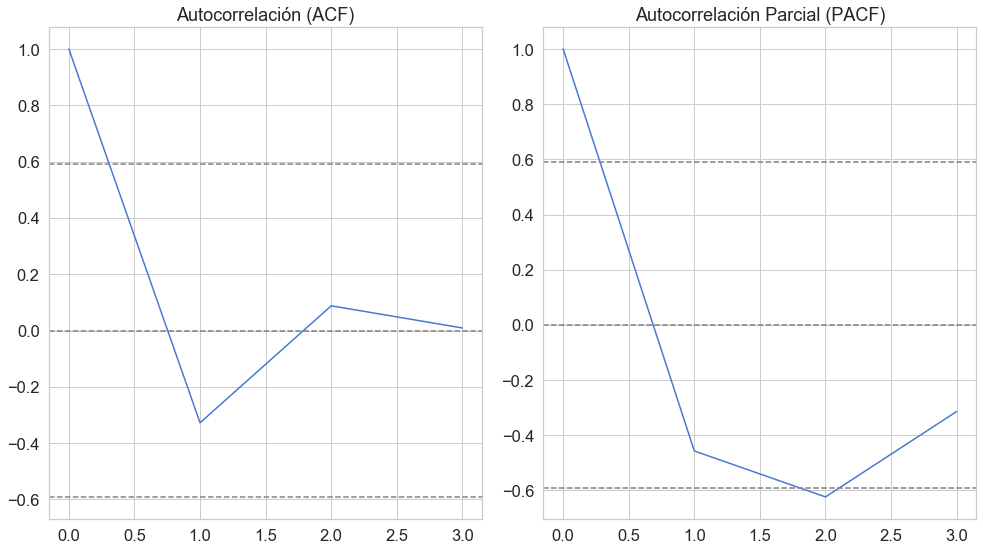

In [117]:
#Uso de la librería StatsModels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(vpm_df_log_diff, nlags=3) #Modified for the amount of test
lag_pacf = pacf(vpm_df_log_diff, nlags=3, method='ols') #Modified for the amount of test

#Gráfico para ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vpm_df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vpm_df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelación (ACF)')

#Gráfico para PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vpm_df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vpm_df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelación Parcial (PACF)')
plt.tight_layout()

RSS ARIMA:  0.07172349381143955


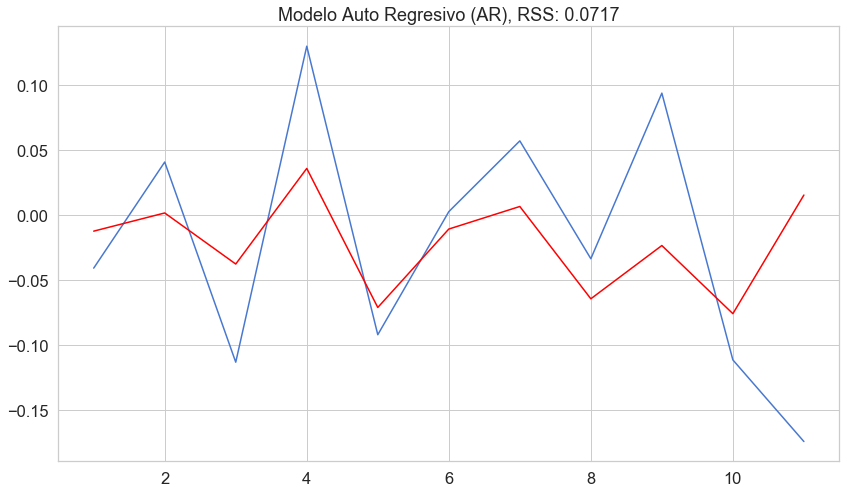

In [147]:
#Solicitar que Jupyter no marque "Warnings"
import warnings
warnings.filterwarnings('ignore')

#Modelo AR
model = ARIMA(vpm_df_log, order = (2, 1, 0))
results_AR = model.fit(disp = -1)
RSS_AR = sum((results_AR.fittedvalues - vpm_df_log_diff)**2)

plt.plot(vpm_df_log_diff);
plt.plot(results_AR.fittedvalues, color='red');
plt.title("Modelo Auto Regresivo (AR), RSS: %.4f"% RSS_AR);
print("RSS ARIMA: ",RSS_AR)

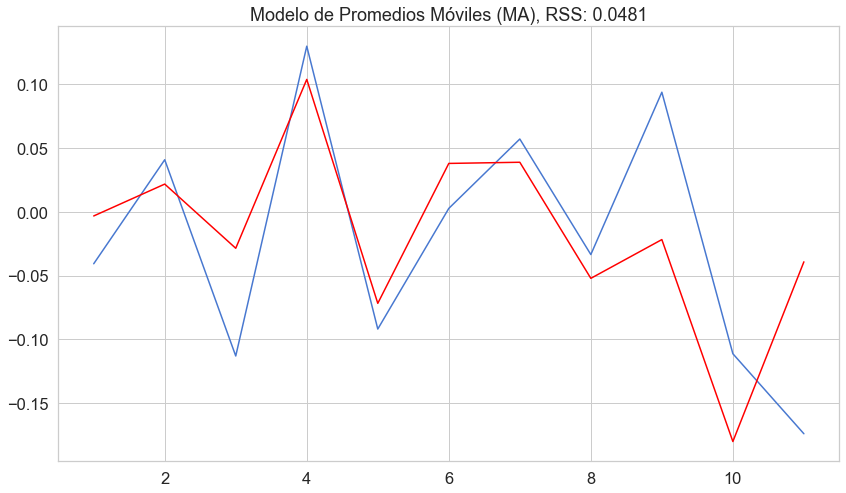

In [121]:
#Solicitar que Jupyter no marque "Warnings"
import warnings
warnings.filterwarnings('ignore')

#Modelo MA
model = ARIMA(vpm_df_log, order = (0, 1, 2))
results_MA = model.fit(disp = -1)
RSS_MA = sum((results_MA.fittedvalues - vpm_df_log_diff)**2)

plt.plot(vpm_df_log_diff);
plt.plot(results_MA.fittedvalues, color='red');
plt.title("Modelo de Promedios Móviles (MA), RSS: %.4f"% RSS_MA);

In [ ]:
model = ARIMA(vpm_df_log, order = (0,1,2))#Modified

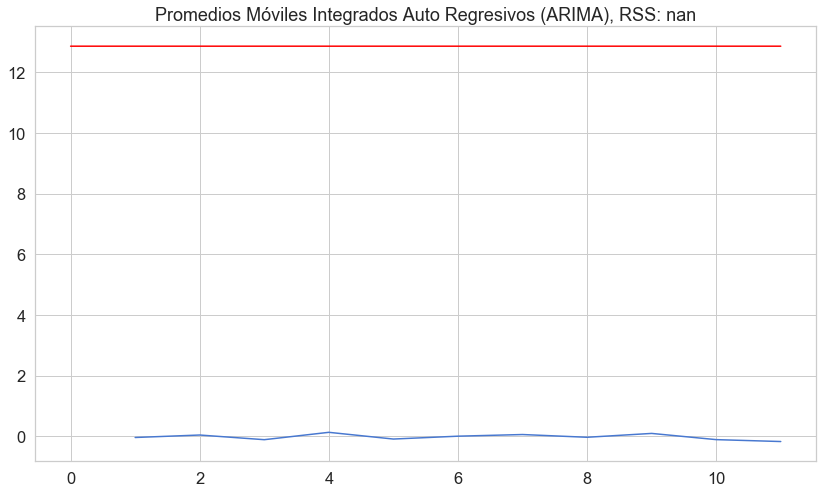

In [141]:
#Solicitar que Jupyter no marque "Warnings"
import warnings
warnings.filterwarnings('ignore')

model = ARIMA(vpm_df_log, order = (,,))#Modified
#https://stats.stackexchange.com/questions/251480/statsmodels-says-arima-is-not-appropriate-because-series-is-not-stationary-how
results_ARIMA = model.fit(disp = -1)
RSS_ARIMA = sum((results_ARIMA.fittedvalues - vpm_df_log_diff)**2)

plt.plot(vpm_df_log_diff);
plt.plot(results_ARIMA.fittedvalues, color='red');
plt.title("Promedios Móviles Integrados Auto Regresivos (ARIMA), RSS: %.4f"% RSS_ARIMA);

In [142]:
print("Valor RSS para AR =",RSS_AR)
print("Valor RSS para MA =",RSS_MA)
print("Valor RSS para ARIMA =",RSS_ARIMA)

Valor RSS para AR = 0.07172349381143955
Valor RSS para MA = 0.04809290172583244
Valor RSS para ARIMA = nan


In [143]:
#Asignación de las Predicciones a una Serie
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print(predictions_ARIMA_diff.head())

0    12.861064
1    12.861071
2    12.861058
3    12.861076
4    12.861043
dtype: float64


In [144]:
#Asignación de la Suma Acumulada a una Serie
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum.head())

0    12.861064
1    25.722134
2    38.583193
3    51.444269
4    64.305312
dtype: float64


In [145]:
#Adición de la Suma Acumulada a la Serie Original
predictions_ARIMA_log = pd.Series(vpm_df_log.loc[vpm_df_log.index[0]], index=vpm_df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

print(predictions_ARIMA_log.head())

0    25.773123
1    38.634194
2    51.495252
3    64.356328
4    77.217372
dtype: float64


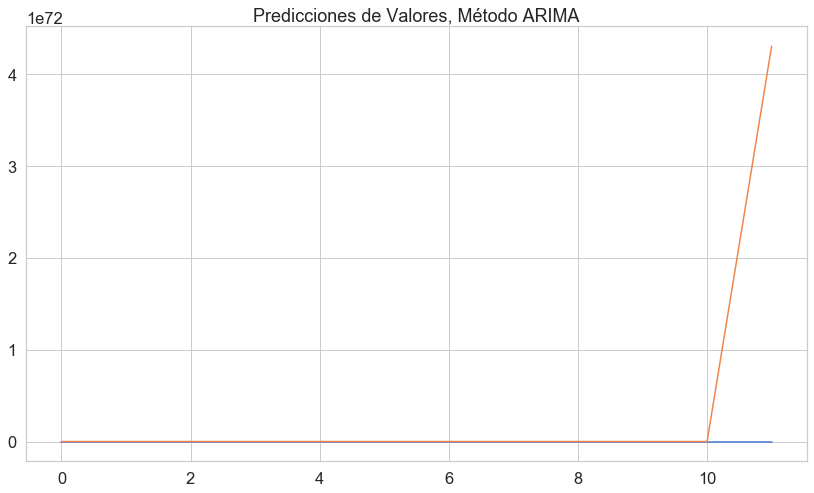

In [146]:
#Conversión al Dominio del Tiempo
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(vpm_df['Viajes']);
plt.plot(predictions_ARIMA);
plt.title("Predicciones de Valores, Método ARIMA");